In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sample_generator import generate_sample

In [2]:
true_pars = {}
with open(r'C:\Users\Артем\Documents\GitHub\NN-Clusters\catalogue_sampler\true_cosmo_pars.txt', 'r') as f:
    for line in f:
        line = line.split()
        true_pars[line[0]] = float(line[1])

In [3]:
print(true_pars)

{'omega_m': 0.3, 'sigma_8': 0.8, 'h0': 70.0, 'ns': 0.95, 'ob': 0.03, 'a_cr': 0.1, 'b_cr': 2.0, 'delta_cr': 0.4, 'gamma_cr': -0.4, 'sigma_cr': 0.3, 'a_l': 40.0, 'b_l': 2.0, 'delta_l': -0.69, 'gamma_l': -0.85, 'sigma_l': 1.0, 'r_cr_l': 0.0}


In [4]:
cat = generate_sample(true_pars)

In [5]:
len(cat)

1113

In [6]:
df = pd.DataFrame(cat, columns=["Z", "CR", "LAMBDA", "EXP"])

In [7]:
df.describe()

,Z,CR,LAMBDA,EXP
count,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.246319,0.742012,108.167305,314.082550
std,0.128174,0.912564,78.582603,333.310822
min,0.100219,0.020963,3.196712,66.766510
25%,0.147581,0.279410,39.569210,134.086792
50%,0.209994,0.529178,94.039917,176.695587
75%,0.307243,0.908361,162.890060,352.319336
max,0.752783,12.421136,299.180939,2418.110596


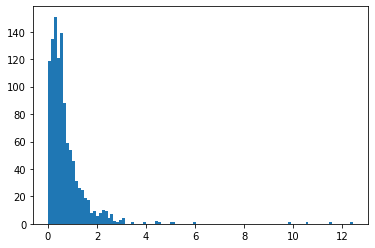

In [8]:
plt.hist(df["CR"], bins='auto')
plt.show()

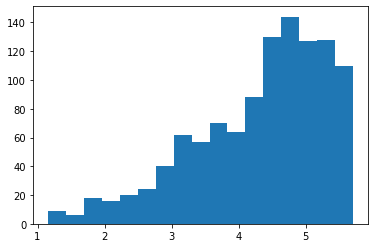

In [9]:
plt.hist(np.log(df["LAMBDA"]), bins='auto')
plt.show()

In [10]:
df["EXP"].min()

66.76651

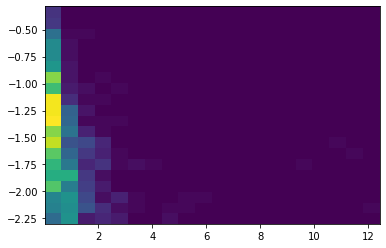

In [11]:
plt.hist2d(df["CR"], np.log(df["Z"]), bins=20)
plt.show()

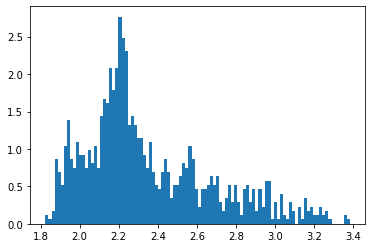

In [12]:
plt.hist(np.log10(df["EXP"]), bins=100, density=True)
plt.show()

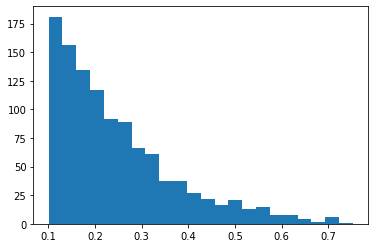

In [13]:
plt.hist(df["Z"], bins='auto')
plt.show()

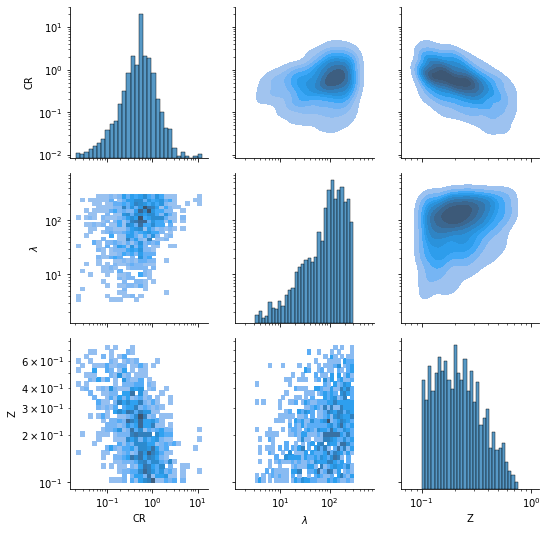

In [14]:
g = sns.PairGrid(
    df[df["CR"]>0.01].rename(columns={"LAMBDA": r"$\lambda$"})[["CR", r"$\lambda$", 'Z']], 
    diag_sharey=False)
g.map_lower(sns.histplot, log_scale=True, bins=30)
g.map_diag(sns.histplot, log_scale=True, bins=30)
g.map_upper(sns.kdeplot, fill=True, log_scale=True)